In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
import matplotlib.ticker as ticker

In [ ]:
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

In [3]:
comments_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data", "comments_final_labels.csv") 

df_comments = pd.read_csv(comments_path)

df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor,bert_label,bert_skor,joeddav_label,joeddav_skor,kaixkhazaki_label,kaixkhazaki_skor,MoritzLaurer_label,MoritzLaurer_skor,ZeroShot_label,ZeroShot_skor,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.931962,olumlu,0.963947,olumlu,0.947954,olumlu,0.997684,olumlu,0.930659,olumlu,0.984298,olumlu,0.970880,olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,olumsuz,-0.669085,olumlu,0.991367,olumlu,0.161141,olumlu,0.936270,olumlu,0.857906,olumsuz,-0.775901,olumlu,0.339425,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumsuz,-0.964131,olumlu,0.924904,olumsuz,-0.019614,olumlu,0.990739,olumlu,0.886708,olumlu,0.897199,olumlu,0.924882,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.906424,olumlu,0.974138,olumlu,0.940281,olumlu,0.993717,olumlu,0.956035,olumlu,0.985931,olumlu,0.978561,olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,olumsuz,-0.999406,olumlu,0.791039,olumsuz,-0.104184,olumsuz,-0.631333,olumlu,0.595040,olumsuz,-0.520216,olumsuz,-0.185503,olumsuz,-0.144843


In [4]:
columns_to_use = ['Tarih','Boy','Kilo','Beden' ,'Ürün Adı', 'Yorum_V1',  'final_label', 'final_skor']

df_comments = df_comments[columns_to_use].copy()

df_comments.head()

,Tarih,Boy,Kilo,Beden,Ürün Adı,Yorum_V1,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,olumsuz,-0.144843


BOY - SKORLAR

In [5]:
df_comments.loc[df_comments['Boy'] == "'Bilgi mevcut değil", 'Boy'] = "Bilgi mevcut değil"

In [6]:
boy_frekans = df_comments['Boy'].value_counts(dropna=False).reset_index()
boy_frekans.columns = ['Boy', 'Adet']
boy_frekans = boy_frekans.sort_values(by='Adet', ascending=False).reset_index(drop=True)
boy_frekans

,Boy,Adet
0,Bilgi mevcut değil,51378
1,160cm,8266
2,165cm,7237
3,170cm,5715
4,168cm,4633
5,163cm,3985
6,158cm,2909
7,167cm,2775
8,162cm,2556
9,155cm,2062


In [8]:
boy_frekans = boy_frekans[boy_frekans['Boy'] != 'Bilgi mevcut değil']

boy_frekans['Boy'] = boy_frekans['Boy'].str.replace('cm', '').astype(int)

boy_frekans['Boy_Grouped'] = boy_frekans['Boy'].apply(lambda x: '150 altı' if x < 150 else str(x))

boy_frekans_grouped = boy_frekans.groupby('Boy_Grouped')['Adet'].sum().reset_index()

boy_frekans_grouped.head()

C:\Users\SILA\AppData\Local\Temp\ipykernel_11852\1823316429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boy_frekans['Boy'] = boy_frekans['Boy'].str.replace('cm', '').astype(int)
C:\Users\SILA\AppData\Local\Temp\ipykernel_11852\1823316429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boy_frekans['Boy_Grouped'] = boy_frekans['Boy'].apply(lambda x: '150 altı' if x < 150 else str(x))


,Boy_Grouped,Adet
0,150,489
1,150 altı,288
2,151,36
3,152,226
4,153,358


In [12]:
max_value = boy_frekans['Boy'].max()
print(f"Maksimum boy değeri: ",max_value)

Maksimum boy değeri:  250


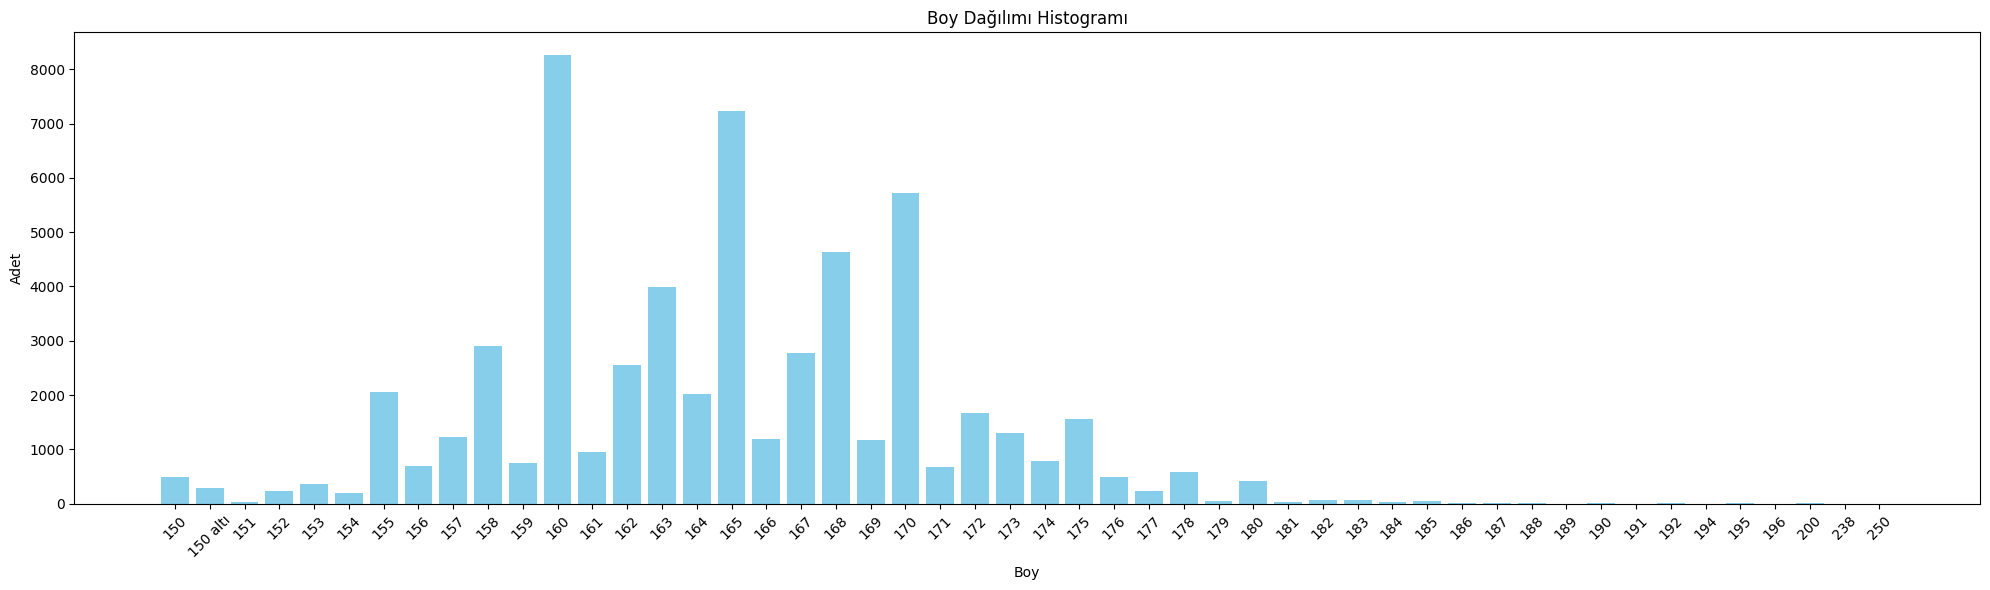

In [10]:
plt.figure(figsize=(20, 6))
plt.bar(boy_frekans_grouped['Boy_Grouped'], boy_frekans_grouped['Adet'], color='skyblue')
plt.xlabel('Boy')
plt.ylabel('Adet')
plt.title('Boy Dağılımı Histogramı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

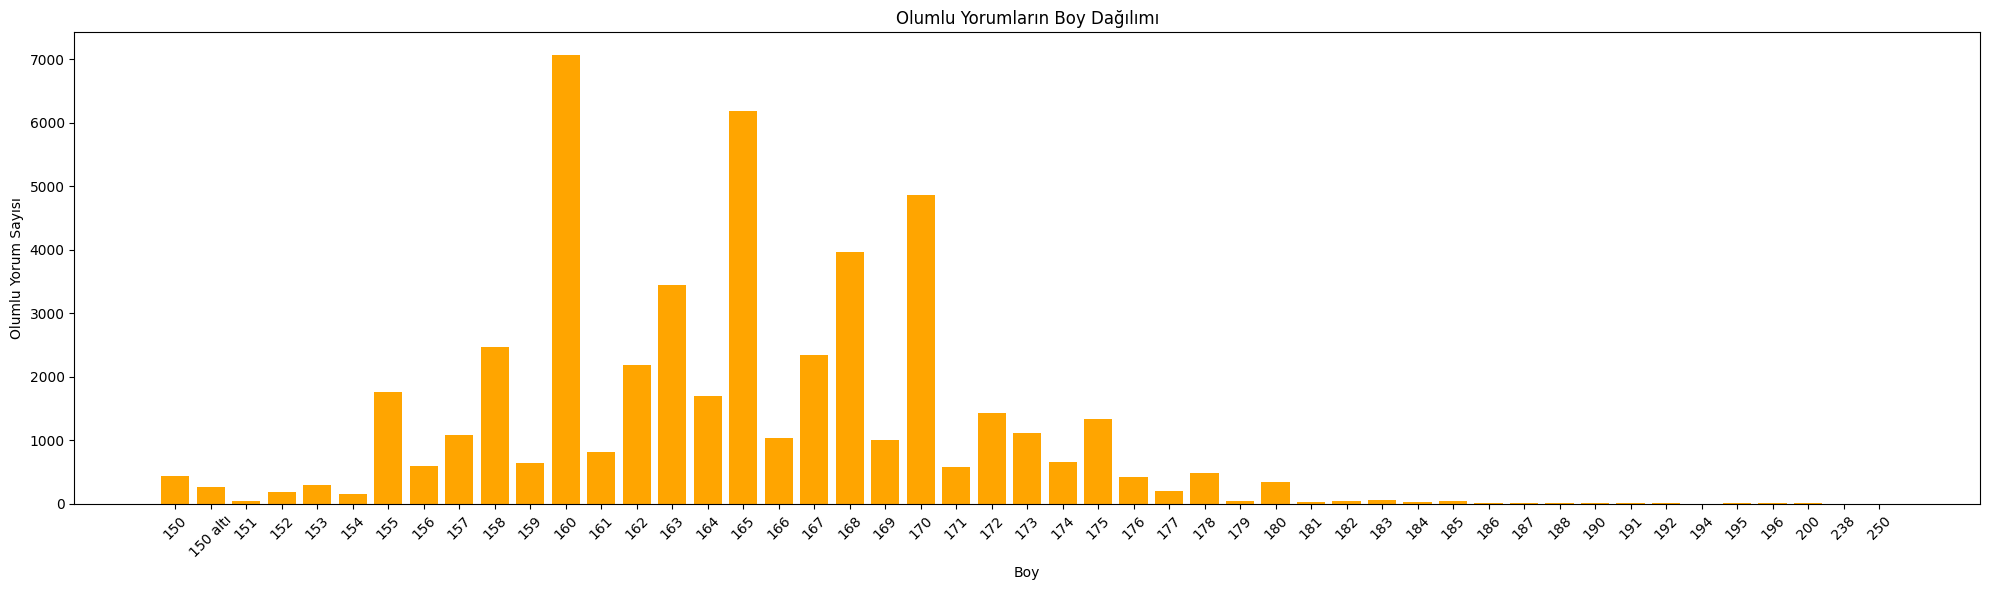

In [14]:
df_positive = df_comments[df_comments['final_label'] == 'olumlu'].copy()

df_positive = df_positive[df_positive['Boy'] != 'Bilgi mevcut değil']

df_positive['Boy'] = df_positive['Boy'].str.replace('cm', '').astype(int)

df_positive['Boy_Grouped'] = df_positive['Boy'].apply(lambda x: '150 altı' if x < 150 else str(x))

boy_counts = df_positive['Boy_Grouped'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
plt.bar(boy_counts.index, boy_counts.values, color='orange')
plt.xlabel('Boy')
plt.ylabel('Olumlu Yorum Sayısı')
plt.title('Olumlu Yorumların Boy Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

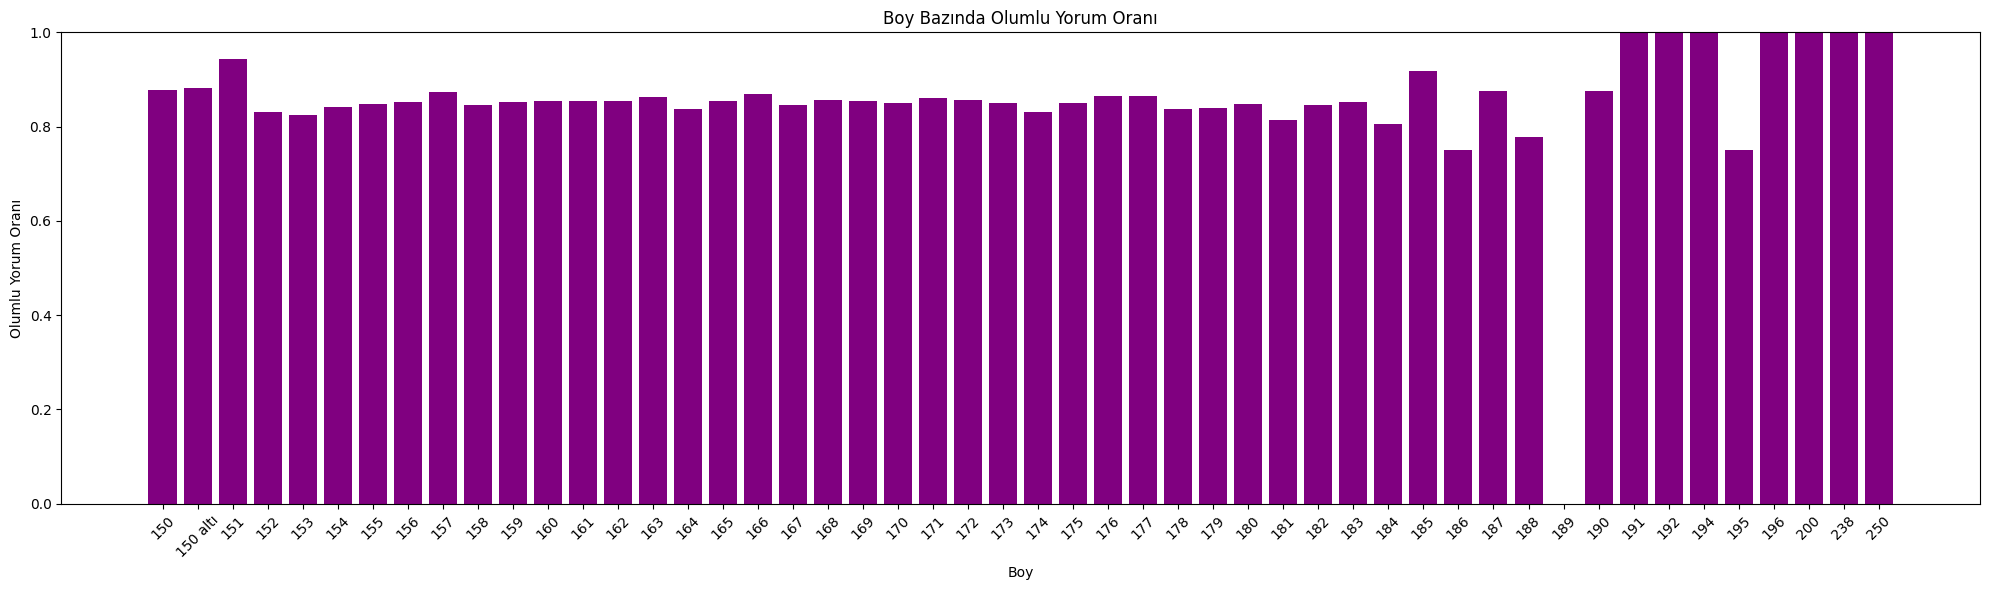

In [19]:
df_clean = df_comments[df_comments['Boy'] != 'Bilgi mevcut değil'].copy()

df_clean['Boy'] = df_clean['Boy'].str.replace('cm', '').astype(int)

df_clean['Boy_Grouped'] = df_clean['Boy'].apply(lambda x: '150 altı' if x < 150 else str(x))

total_counts = df_clean.groupby('Boy_Grouped').size()
positive_counts = df_clean[df_clean['final_label'] == 'olumlu'].groupby('Boy_Grouped').size()

positive_ratio = (positive_counts / total_counts).fillna(0)

plt.figure(figsize=(20, 6))
plt.bar(positive_ratio.index, positive_ratio.values, color='purple')
plt.xlabel('Boy')
plt.ylabel('Olumlu Yorum Oranı')
plt.title('Boy Bazında Olumlu Yorum Oranı')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KİLO - SKORLAR

In [21]:
df_comments.loc[df_comments['Kilo'] == "'Bilgi mevcut değil", 'Kilo'] = "Bilgi mevcut değil"

In [22]:
kilo_frekans = df_comments['Kilo'].value_counts(dropna=False).reset_index()
kilo_frekans.columns = ['Kilo', 'Adet']
kilo_frekans = kilo_frekans.sort_values(by='Adet', ascending=False).reset_index(drop=True)
kilo_frekans

,Kilo,Adet
0,Bilgi mevcut değil,51377
1,60,3873
2,55,3566
3,65,3120
4,58,2644
5,50,2414
6,70,2398
7,52,1926
8,57,1894
9,53,1891


In [35]:
kilo_frekans = kilo_frekans[kilo_frekans['Kilo'] != 'Bilgi mevcut değil'].copy()

kilo_frekans['Kilo'] = kilo_frekans['Kilo'].astype(int)

def group_kilo(x):
    if x < 40:
        return '40 altı'
    elif x > 100:
        return '100 üstü'
    else:
        return str(x)

kilo_frekans['Kilo_Grouped'] = kilo_frekans['Kilo'].apply(group_kilo)

kilo_frekans_grouped = kilo_frekans.groupby('Kilo_Grouped')['Adet'].sum().reset_index()

def kilo_sort_key(x):
    if x == '40 altı':
        return -1
    elif x == '100 üstü':
        return 999
    else:
        return int(x)

kilo_frekans_grouped = kilo_frekans_grouped.sort_values(by='Kilo_Grouped', key=lambda col: col.map(kilo_sort_key))

kilo_frekans_grouped.head()

,Kilo_Grouped,Adet
3,40 altı,123
2,40,113
4,41,37
5,42,146
6,43,217


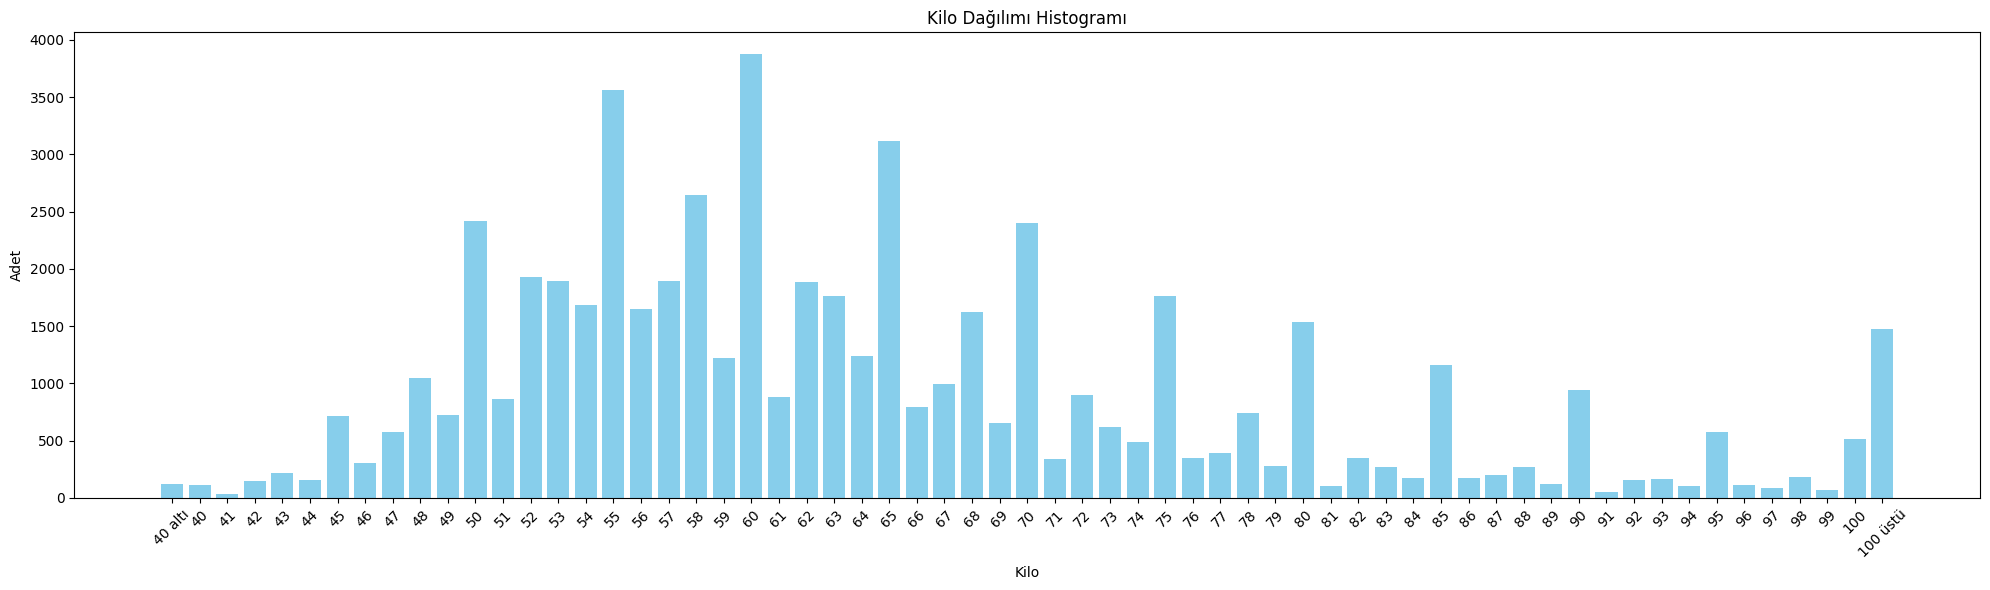

In [34]:
plt.figure(figsize=(20, 6))
plt.bar(kilo_frekans_grouped['Kilo_Grouped'], kilo_frekans_grouped['Adet'], color='skyblue')
plt.xlabel('Kilo')
plt.ylabel('Adet')
plt.title('Kilo Dağılımı Histogramı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
max_value = kilo_frekans['Kilo'].max()
print(f"Maksimum kilo değeri: ",max_value)

Maksimum kilo değeri:  200


In [37]:
df_filtered = df_comments[df_comments['Kilo'] != 'Bilgi mevcut değil'].copy()

df_positive = df_filtered[df_filtered['final_label'] == 'olumlu'].copy()

df_positive['Kilo_num'] = df_positive['Kilo'].astype(int)

def group_kilo(x):
    if x < 40:
        return '40 altı'
    elif x > 100:
        return '100 üstü'
    else:
        return str(x)

df_positive['Kilo_Grouped'] = df_positive['Kilo_num'].apply(group_kilo)

kilo_positive_counts = df_positive.groupby('Kilo_Grouped').size().reset_index(name='Adet')

def kilo_sort_key(x):
    if x == '40 altı':
        return -1
    elif x == '100 üstü':
        return 999
    else:
        return int(x)

kilo_positive_counts = kilo_positive_counts.sort_values(by='Kilo_Grouped', key=lambda col: col.map(kilo_sort_key))

kilo_positive_counts.head()

,Kilo_Grouped,Adet
3,40 altı,98
2,40,99
4,41,34
5,42,130
6,43,182


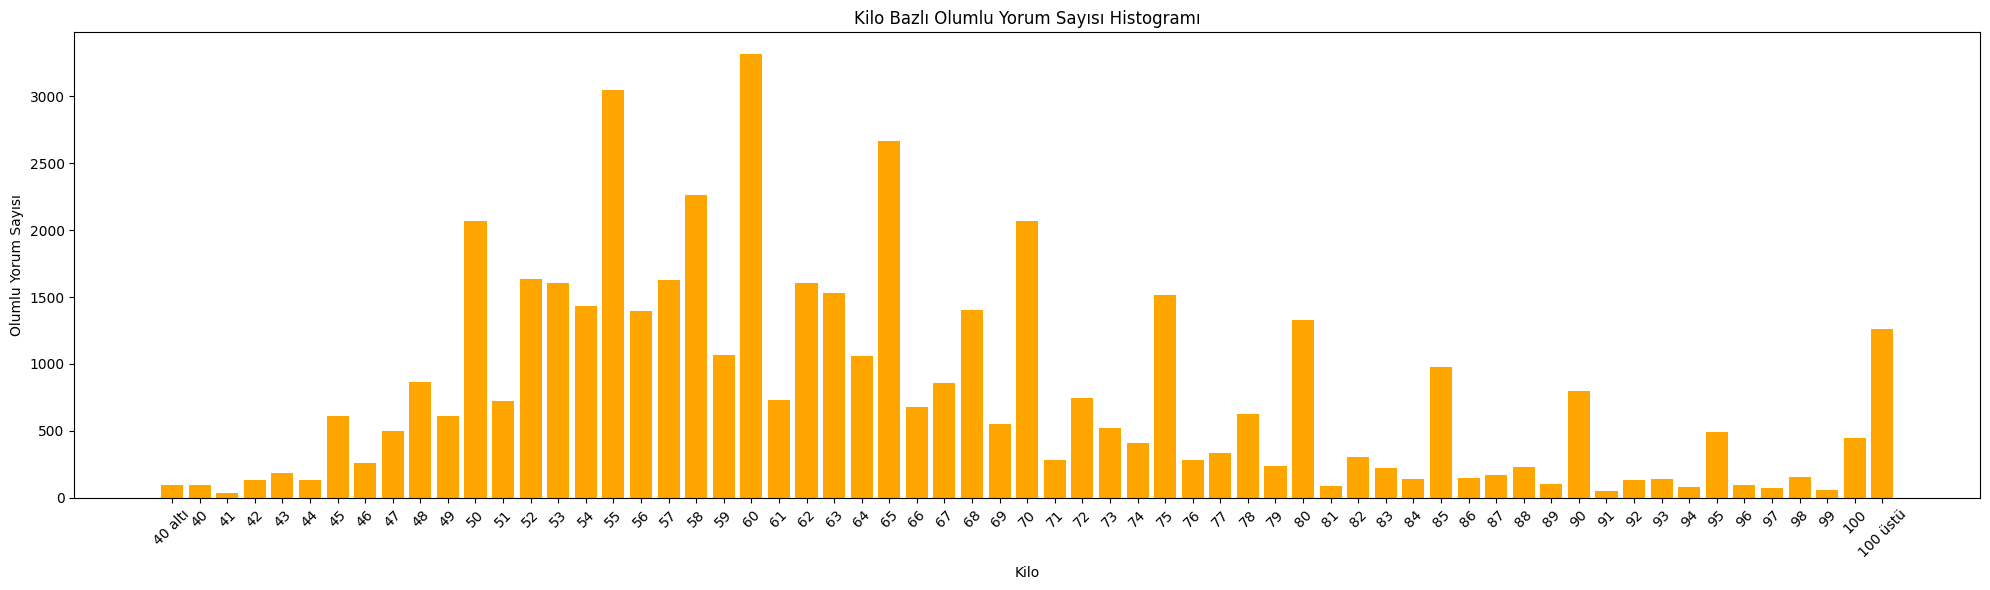

In [38]:
plt.figure(figsize=(20, 6))
plt.bar(kilo_positive_counts['Kilo_Grouped'], kilo_positive_counts['Adet'], color='orange')
plt.xlabel('Kilo')
plt.ylabel('Olumlu Yorum Sayısı')
plt.title('Kilo Bazlı Olumlu Yorum Sayısı Histogramı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

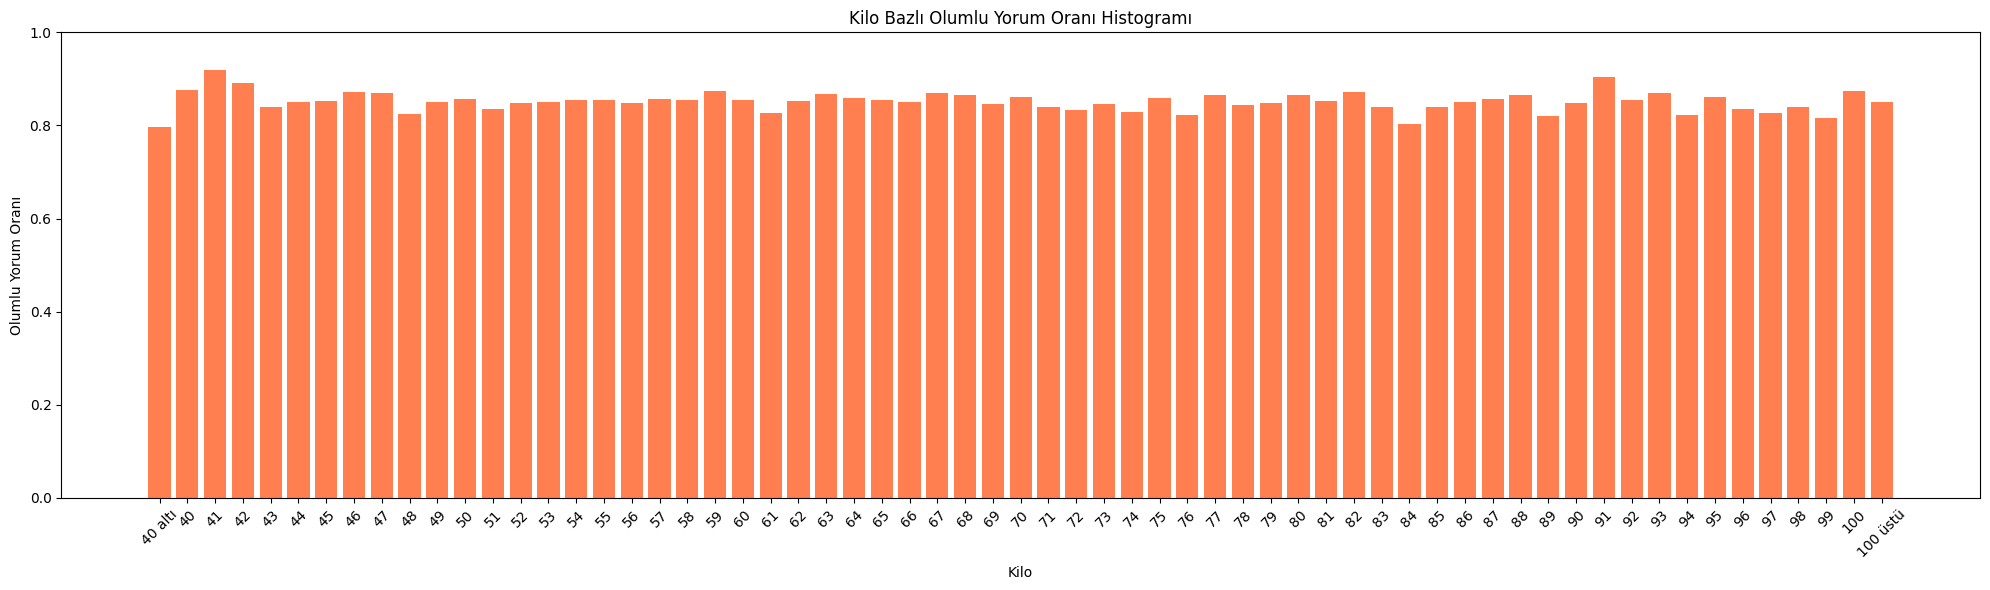

In [39]:
df_filtered = df_comments[df_comments['Kilo'] != 'Bilgi mevcut değil'].copy()

df_filtered['Kilo_num'] = df_filtered['Kilo'].astype(int)

def group_kilo(x):
    if x < 40:
        return '40 altı'
    elif x > 100:
        return '100 üstü'
    else:
        return str(x)

df_filtered['Kilo_Grouped'] = df_filtered['Kilo_num'].apply(group_kilo)

grouped = df_filtered.groupby(['Kilo_Grouped', 'final_label']).size().unstack(fill_value=0)

grouped['olumlu_oran'] = grouped.get('olumlu', 0) / (grouped.get('olumlu', 0) + grouped.get('olumsuz', 0))

result = grouped.reset_index()

def kilo_sort_key(x):
    if x == '40 altı':
        return -1
    elif x == '100 üstü':
        return 999
    else:
        return int(x)

result = result.sort_values(by='Kilo_Grouped', key=lambda col: col.map(kilo_sort_key))

plt.figure(figsize=(20, 6))
plt.bar(result['Kilo_Grouped'], result['olumlu_oran'], color='coral')
plt.xlabel('Kilo')
plt.ylabel('Olumlu Yorum Oranı')
plt.title('Kilo Bazlı Olumlu Yorum Oranı Histogramı')
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.tight_layout()
plt.show()

BEDEN - SKORLAR

In [40]:
df_comments.loc[df_comments['Beden'] == "'Bilgi mevcut değil", 'Beden'] = "Bilgi mevcut değil"
beden_frekans = df_comments['Beden'].value_counts(dropna=False).reset_index()
beden_frekans.columns = ['Beden', 'Adet']
beden_frekans = beden_frekans.sort_values(by='Adet', ascending=False).reset_index(drop=True)
beden_frekans

,Beden,Adet
0,Bilgi mevcut değil,20260
1,38,12702
2,36,11654
3,40,8707
4,42,8175
5,M,7513
6,34,7467
7,S,7076
8,L,5495
9,XL,3786


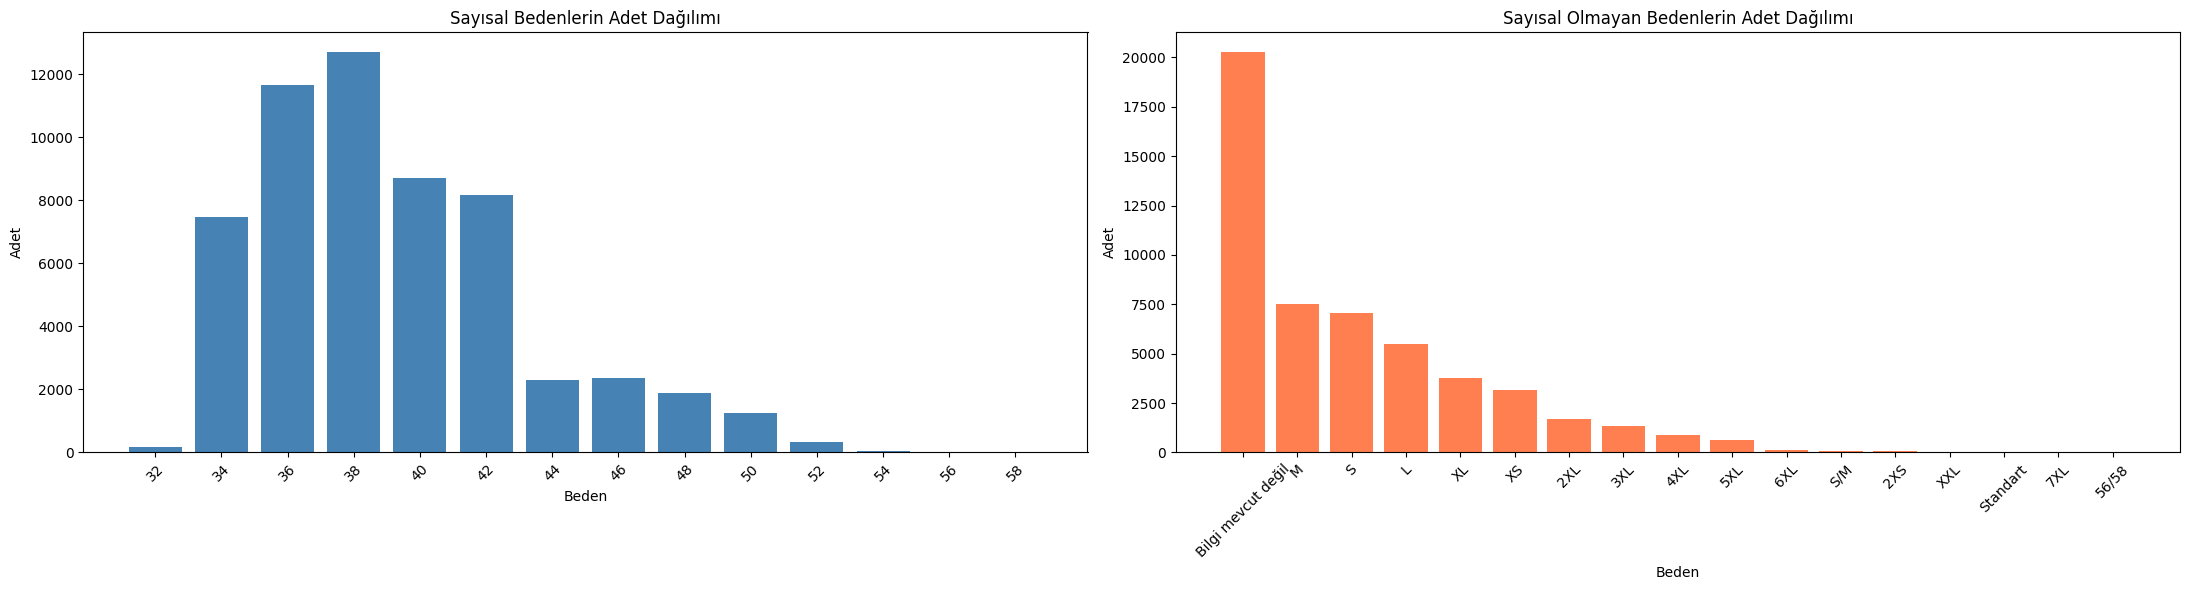

In [ ]:
beden_frekans['is_numeric'] = beden_frekans['Beden'].apply(lambda x: str(x).isdigit())

numeric_beden = beden_frekans[beden_frekans['is_numeric']].copy()
non_numeric_beden = beden_frekans[~beden_frekans['is_numeric']].copy()

numeric_beden = numeric_beden.sort_values(by='Beden', key=lambda col: col.astype(int))

non_numeric_beden = non_numeric_beden.sort_values(by='Adet', ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(22,6))

axs[0].bar(numeric_beden['Beden'], numeric_beden['Adet'], color='steelblue')
axs[0].set_title('Sayısal Bedenlerin Adet Dağılımı')
axs[0].set_xlabel('Beden')
axs[0].set_ylabel('Adet')
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(non_numeric_beden['Beden'], non_numeric_beden['Adet'], color='coral')
axs[1].set_title('Sayısal Olmayan Bedenlerin Adet Dağılımı')
axs[1].set_xlabel('Beden')
axs[1].set_ylabel('Adet')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

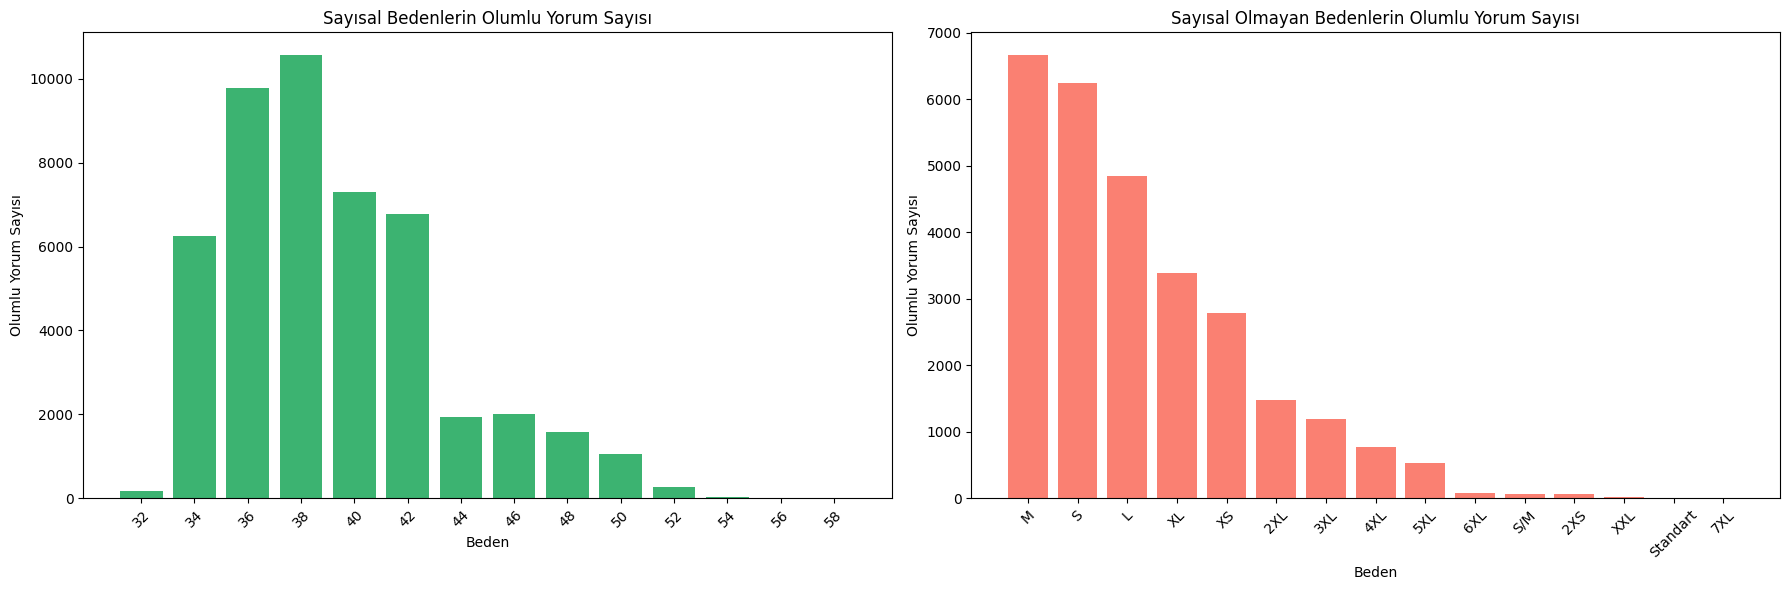

In [ ]:
df_filtered = df_comments[df_comments['Beden'] != 'Bilgi mevcut değil'].copy()
df_positive = df_filtered[df_filtered['final_label'] == 'olumlu'].copy()

df_positive['is_numeric'] = df_positive['Beden'].apply(lambda x: str(x).isdigit())

numeric_positive_counts = df_positive[df_positive['is_numeric']].groupby('Beden').size().reset_index(name='Olumlu_Adet')
numeric_positive_counts = numeric_positive_counts.sort_values(by='Beden', key=lambda col: col.astype(int))

non_numeric_positive_counts = df_positive[~df_positive['is_numeric']].groupby('Beden').size().reset_index(name='Olumlu_Adet')
non_numeric_positive_counts = non_numeric_positive_counts.sort_values(by='Olumlu_Adet', ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(18,6))

axs[0].bar(numeric_positive_counts['Beden'], numeric_positive_counts['Olumlu_Adet'], color='mediumseagreen')
axs[0].set_title('Sayısal Bedenlerin Olumlu Yorum Sayısı')
axs[0].set_xlabel('Beden')
axs[0].set_ylabel('Olumlu Yorum Sayısı')
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(non_numeric_positive_counts['Beden'], non_numeric_positive_counts['Olumlu_Adet'], color='salmon')
axs[1].set_title('Sayısal Olmayan Bedenlerin Olumlu Yorum Sayısı')
axs[1].set_xlabel('Beden')
axs[1].set_ylabel('Olumlu Yorum Sayısı')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


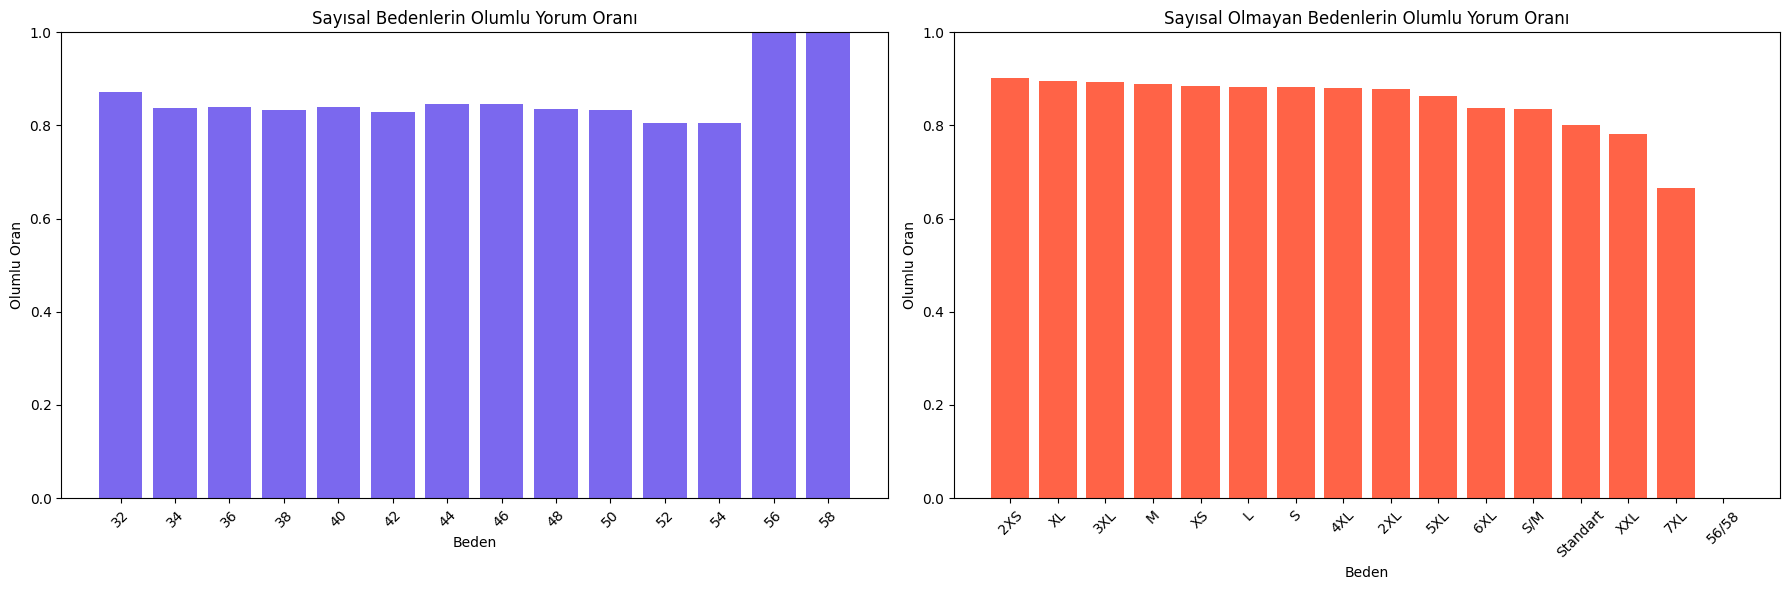

In [ ]:
df_filtered = df_comments[df_comments['Beden'] != 'Bilgi mevcut değil'].copy()

df_filtered['is_numeric'] = df_filtered['Beden'].apply(lambda x: str(x).isdigit())

total_numeric = df_filtered[df_filtered['is_numeric']].groupby('Beden').size().reset_index(name='Toplam')

positive_numeric = df_filtered[(df_filtered['is_numeric']) & (df_filtered['final_label'] == 'olumlu')].groupby('Beden').size().reset_index(name='Olumlu')

numeric = pd.merge(total_numeric, positive_numeric, on='Beden', how='left')
numeric['Olumlu'] = numeric['Olumlu'].fillna(0)
numeric['Olumlu_Oran'] = numeric['Olumlu'] / numeric['Toplam']
numeric = numeric.sort_values(by='Beden', key=lambda col: col.astype(int))

total_non_numeric = df_filtered[~df_filtered['is_numeric']].groupby('Beden').size().reset_index(name='Toplam')

positive_non_numeric = df_filtered[(~df_filtered['is_numeric']) & (df_filtered['final_label'] == 'olumlu')].groupby('Beden').size().reset_index(name='Olumlu')

non_numeric = pd.merge(total_non_numeric, positive_non_numeric, on='Beden', how='left')
non_numeric['Olumlu'] = non_numeric['Olumlu'].fillna(0)
non_numeric['Olumlu_Oran'] = non_numeric['Olumlu'] / non_numeric['Toplam']
non_numeric = non_numeric.sort_values(by='Olumlu_Oran', ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(18,6))

axs[0].bar(numeric['Beden'], numeric['Olumlu_Oran'], color='mediumslateblue')
axs[0].set_title('Sayısal Bedenlerin Olumlu Yorum Oranı')
axs[0].set_xlabel('Beden')
axs[0].set_ylabel('Olumlu Oran')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylim(0,1)

axs[1].bar(non_numeric['Beden'], non_numeric['Olumlu_Oran'], color='tomato')
axs[1].set_title('Sayısal Olmayan Bedenlerin Olumlu Yorum Oranı')
axs[1].set_xlabel('Beden')
axs[1].set_ylabel('Olumlu Oran')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_ylim(0,1)

plt.tight_layout()
plt.show()
